In [167]:
import pandas as pd
import geopandas as gpd

In [168]:
df = pd.read_excel("NFHS_5_India_Districts_Factsheet_Data.xls")

In [169]:
df = df[['District Names',"State/UT",' Sex ratio of the total population (females per 1,000 males)','Sex ratio at birth for children born in the last five years (females per 1,000 males)']]

In [170]:
df

,District Names,State/UT,"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)"
0,Nicobars,Andaman & Nicobar Islands,973.31,927.41
1,North & Middle Andaman,Andaman & Nicobar Islands,949.82,844.43
2,South Andaman,Andaman & Nicobar Islands,967.48,934.92
3,Srikakulam,Andhra Pradesh,1139.51,1162.58
4,Vizianagaram,Andhra Pradesh,1114.35,898.03
...,...,...,...,...
702,South Twenty Four Pargana,West Bengal,1054.81,1099.04
703,Paschim Medinipur,West Bengal,1088.57,1005.04
704,Purba Medinipur,West Bengal,1031.40,777.38
705,Paschim Barddhaman,West Bengal,977.46,786.93


In [171]:
df = df.rename(columns={
    ' Sex ratio of the total population (females per 1,000 males)': "sex_ratio",
    "Sex ratio at birth for children born in the last five years (females per 1,000 males)" : "sex_ratio_at_birth"
})


In [172]:
gdf = gpd.read_file("map/output.shp")

# gdf = gpd.read_file("INDIA_DISTRICTS.geojson")

In [173]:
state_name_map = {
    'Maharastra': 'Maharashtra',
    'Odisha': 'Orissa',
    'Puducherry': 'Pondicherry',
    'Chhattisgarh': 'Chhatisgarh',
    ' Lakshadweep ': 'Lakshadweep',
    'Dadra and Nagar Haveli & Daman and Diu': 'Dadra & Nagar Haveli',  # or 'Daman & Diu', depending on match
}


In [174]:
# Standardize and clean state names in df
df['State/UT'] = df['State/UT'].str.strip()
df['State/UT'] = df['State/UT'].replace(state_name_map)

# Also clean gdf statenames for consistency
gdf['statename'] = gdf['statename'].str.strip()


In [175]:
df_states = set(df['State/UT'].unique())
gdf_states = set(gdf['statename'].unique())

unmatched_states = df_states - gdf_states

print("Unmatched state names after mapping:", unmatched_states)


Unmatched state names after mapping: set()


In [176]:
import pandas as pd

# Strip and standardize case for better matching
df['District Names'] = df['District Names'].str.strip().str.lower()
df['State/UT'] = df['State/UT'].str.strip().str.lower()

gdf['distname'] = gdf['distname'].str.strip().str.lower()
gdf['statename'] = gdf['statename'].str.strip().str.lower()

# Get unique list of states present in df
states = df['State/UT'].unique()

for state in states:
    df_dists = df[df['State/UT'] == state]['District Names'].unique()
    gdf_dists = gdf[gdf['statename'] == state]['distname'].unique()
    
    # Find unmatched districts
    unmatched = set(df_dists) - set(gdf_dists)
    
    print(f"\nChecking for the state: {state.title()}")
    print(f"Matched {len(df_dists) - len(unmatched)} out of {len(df_dists)} districts.")
    print(f"Total number of non-matches: {len(unmatched)}")
    if unmatched:
        print(f"Unmatched districts: {sorted(unmatched)}")
    else:
        print("All districts matched.")
    print(f"District names in gdf for {state.title()}: {sorted(gdf_dists)}")



Checking for the state: Andaman & Nicobar Islands
Matched 2 out of 3 districts.
Total number of non-matches: 1
Unmatched districts: ['north & middle andaman']
District names in gdf for Andaman & Nicobar Islands: ['nicobars', 'north  & middle andaman', 'south andaman']

Checking for the state: Andhra Pradesh
Matched 11 out of 13 districts.
Total number of non-matches: 2
Unmatched districts: ['sri potti sriramulu nello', 'y.s.r.']
District names in gdf for Andhra Pradesh: ['anantapur', 'chittoor', 'east godavari', 'guntur', 'kadapa(ysr)', 'krishna', 'kurnool', 'prakasam', 'sri potti sriramulu nellore', 'srikakulam', 'visakhapatnam', 'vizianagaram', 'west godavari']

Checking for the state: Arunachal Pradesh
Matched 16 out of 20 districts.
Total number of non-matches: 4
Unmatched districts: ['kra daadi', 'longding', 'namsai', 'siang']
District names in gdf for Arunachal Pradesh: ['anjaw', 'changlang', 'dibang valley', 'east kameng', 'east siang', 'kurung kumey', 'lohit', 'lower dibang va

In [177]:
# 1. Manual correction dictionary (you already have it)
manual_corrections = {
    'north & middle andaman': 'north  & middle andaman',
    'sri potti sriramulu nello': 'sri potti sriramulu nellore',
    'y.s.r.': 'kadapa(ysr)',
    'kra daadi': 'kurung kumey',
    'longding': 'tirap',
    'namsai': 'lohit',
    'siang': 'east siang',
    'biswanath': 'sonitpur',
    'charaideo': 'sivasagar',
    'hojai': 'nagaon',
    'majuli': 'jorhat',
    'south salmara mancachar': 'dhubri',
    'west karbi anglong': 'karbi anglong',
    'bemetara': 'bemetra',
    'dantewada': 'dakshin bastar dantewada',
    'gariyaband': 'gariaband',
    'janjgir - champa': 'janjgir-champa',
    'kodagaon': 'kondagaon',
    'daman': 'dadra & nagar haveli',
    'diu': 'dadra & nagar haveli',
    'botad': 'batod',
    'charkhi dadri': 'bhiwani',
    'leh(ladakh)': 'leh (ladakh)',
    'agar malwa': 'shajapur',
    'east jantia hills': 'east jaintia hills',
    'chandel': 'champhai',
    'shahdara': 'east',
    'south east': 'south east',  # No exact match in gdf; may drop or approximate
    'north  district': 'north district',
    'bhadradri kothagudem': 'bhadradri',
    'hyderabad': 'hydrabad',
    'jagitial': 'jagtial',
    'jangoan': 'jangaon',
    'jayashankar bhupalapally': 'jayashankar',
    'jogulamba gadwal': 'jogulamba',
    'komaram bheem asifabad': 'komaram bheem',
    'medchal-malkajgiri': 'medchal',
    'ranga reddy': 'rangareddy',
    'warangal rural': 'warangal (r)',
    'warangal urban': 'warangal (u)',
    'yadadri bhuvanagiri': 'yadadri',
    'sepahijala': 'sipahijula',
    'unakoti': 'unokoti',
    'shamli': 'samli',
    'north twenty four pargana': 'north twenty four parganas',
    'paschim barddhaman': 'barddhaman',
    'purba barddhaman': 'barddhaman',
    'south twenty four pargana': 'south twenty four parganas'
}

# 2. Preprocessing: lowercase and strip whitespaces
df['District Names'] = df['District Names'].str.lower().str.strip()
df['State/UT'] = df['State/UT'].str.lower().str.strip()
gdf['distname'] = gdf['distname'].str.lower().str.strip()
gdf['statename'] = gdf['statename'].str.lower().str.strip()

# 3. Apply manual corrections
df['District Names'] = df['District Names'].replace(manual_corrections)



# Merge using gdf as the base (so geometry is preserved)
merged = gdf.merge(
    df,
    left_on=['distname', 'statename'],
    right_on=['District Names', 'State/UT'],
    how='left',
    indicator=True  # Shows whether a match was found
)

# 5. Optional: Check if any still unmatched
unmatched = merged[merged['_merge'] == 'left_only']
print(f"\nNumber of unmatched records after merge: {len(unmatched)}")

# 6. Final cleanup (drop _merge column if not needed)
merged.drop(columns=['_merge'], inplace=True)

# 7. Result
print("Merge successful. Sample output:")
print(merged.head())



Number of unmatched records after merge: 5
Merge successful. Sample output:
   objectid statecode    statename state_ut distcode    distname  distarea  \
0         1        05  uttarakhand    STATE      066    nainital    4251.0   
1         2        05  uttarakhand    STATE      060    dehradun    3088.0   
2         3        05  uttarakhand    STATE      064      almora    3144.0   
3         4        05  uttarakhand    STATE      065   champawat    1766.0   
4         5        05  uttarakhand    STATE      056  uttarkashi    8016.0   

   totalpopul   totalhh  totpopmale  totpopfema    st_areasha     st_lengths  \
0    954605.0  191383.0    493666.0    460939.0  5.322546e+09  506182.695952   
1   1696694.0  347001.0    892199.0    804495.0  4.177236e+09  578188.681639   
2    622506.0  140577.0    291081.0    331425.0  4.140751e+09  463454.225766   
3    259648.0   53953.0    131125.0    128523.0  2.294297e+09  314508.010612   
4    330086.0   67602.0    168597.0    161489.0  1.085

In [178]:
# List to store negative value rows
negatives = []

# Loop through the two columns
for col in ['sex_ratio', 'sex_ratio_at_birth']:
    # Find rows where the column has negative values
    mask = merged[col] < 0
    if mask.any():
        print(f"\n⚠️ Districts with negative values in '{col}':")
        for _, row in merged[mask][['District Names', 'State/UT', col]].iterrows():
            print(f" - {row['District Names']} ({row['State/UT']}): {col} = {row[col]}")
        negatives.append(col)
    else:
        print(f"\n✅ No negative values in '{col}'")

# Summary
if not negatives:
    print("\n🎉 No negative values found in either column.")
else:
    print(f"\nColumns with negative values: {', '.join(negatives)}")



✅ No negative values in 'sex_ratio'

⚠️ Districts with negative values in 'sex_ratio_at_birth':
 - bhopal (madhya pradesh): sex_ratio_at_birth = -1261.45
 - jabalpur (madhya pradesh): sex_ratio_at_birth = -1111.11

Columns with negative values: sex_ratio_at_birth


In [179]:
merged.columns

Index(['objectid', 'statecode', 'statename', 'state_ut', 'distcode',
       'distname', 'distarea', 'totalpopul', 'totalhh', 'totpopmale',
       'totpopfema', 'st_areasha', 'st_lengths', 'geometry', 'District Names',
       'State/UT', 'sex_ratio', 'sex_ratio_at_birth'],
      dtype='object')

merged.statecode.unique()

In [180]:
merged.statename.unique()

array(['uttarakhand', 'himachal pradesh', 'madhya pradesh',
       'jammu & kashmir', 'gujarat', 'andhra pradesh', 'west bengal',
       'uttar pradesh', 'daman & diu', 'kerala', 'lakshadweep', 'sikkim',
       'bihar', 'dadra & nagar haveli', 'jharkhand', 'nct of delhi',
       'haryana', 'punjab', 'karnataka', 'maharashtra', 'chandigarh',
       'pondicherry', 'manipur', 'mizoram', 'tamil nadu', 'nagaland',
       'arunachal pradesh', 'assam', 'tripura', 'meghalaya', 'telangana',
       'goa', 'andaman & nicobar islands', 'orissa', 'rajasthan',
       'chhatisgarh', 'ladakh'], dtype=object)

In [181]:
merged.columns

Index(['objectid', 'statecode', 'statename', 'state_ut', 'distcode',
       'distname', 'distarea', 'totalpopul', 'totalhh', 'totpopmale',
       'totpopfema', 'st_areasha', 'st_lengths', 'geometry', 'District Names',
       'State/UT', 'sex_ratio', 'sex_ratio_at_birth'],
      dtype='object')

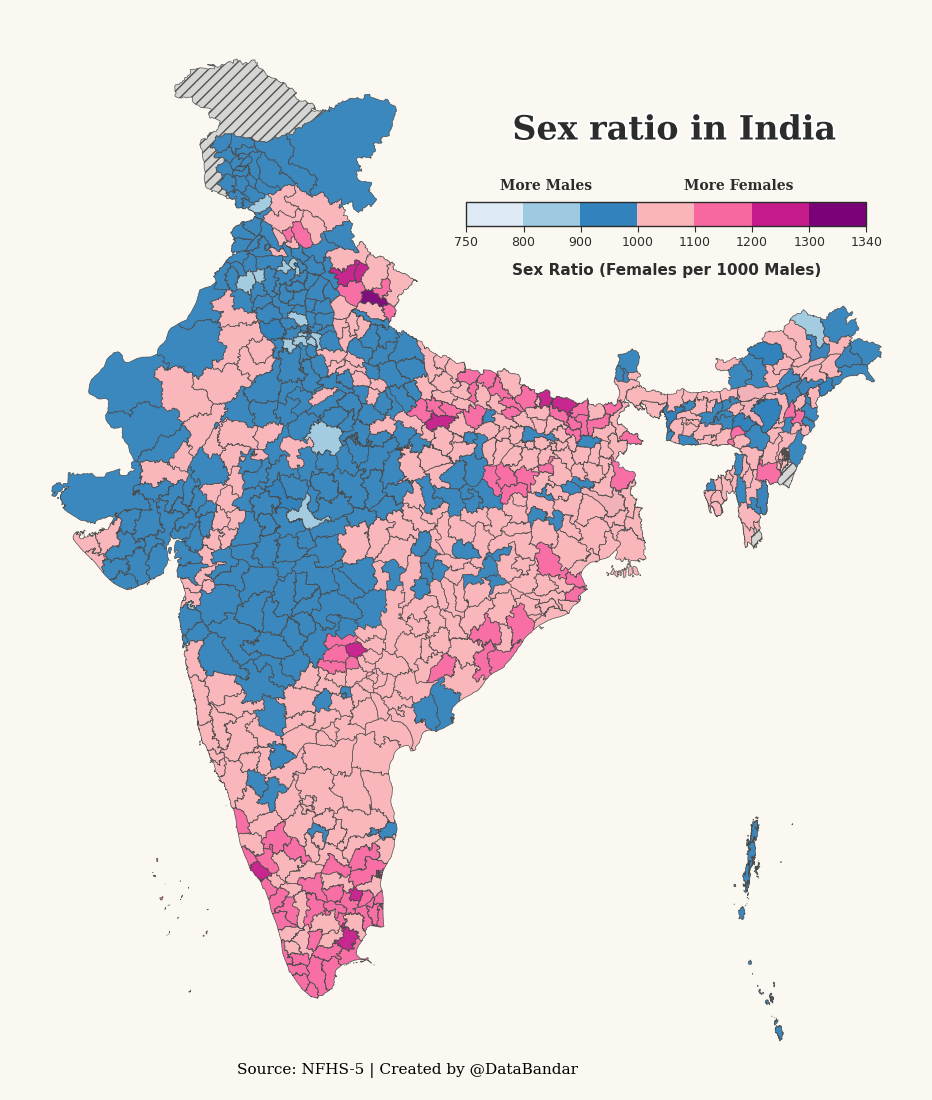

In [182]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patheffects as path_effects
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')

def create_sex_ratio_map(merged):
    fig = plt.figure(figsize=(16, 12))
    fig.patch.set_facecolor('#faf8f0')

    ax_map = plt.axes([0.05, 0.05, 0.9, 0.9])
    ax_map.set_facecolor('#faf8f0')

    # Define bin boundaries
    bounds = [0, 800, 900, 1000, 1100, 1200, 1300, 1500]

    # Color shades: Blue for <1000, Pink for ≥1000
    colors_list = [
        '#deebf7',  # <800
        '#9ecae1',  # 800–900
        '#3182bd',  # 900–1000
        '#fbb4b9',  # 1000–1100
        '#f768a1',  # 1100–1200
        '#c51b8a',  # 1200–1300
        '#7a0177'   # 1300+
    ]

    custom_cmap = ListedColormap(colors_list)
    norm = BoundaryNorm(bounds, custom_cmap.N)

    # Plot map
    merged.plot(
        ax=ax_map,
        column='sex_ratio',
        cmap=custom_cmap,
        norm=norm,
        edgecolor='#4a4a4a',
        linewidth=0.5,
        alpha=0.95,
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "#4a4a4a",
            "hatch": "///",
            "label": "Missing"
        }
    )

    # ax_map.set_title(
    #     'Sex Ratio Across Indian Districts',
    #     fontsize=24, fontweight='bold', fontfamily='serif',
    #     pad=30, color='#2c2c2c',
    #     path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
    # )
    ax_map.set_axis_off()

    # Colorbar
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm._A = []

    cbar_ax = fig.add_axes([0.50, 0.77, 0.25, 0.02])  # Horizontal colorbar

    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', boundaries=bounds)

    # Use actual min and max values from data
    min_val = int((merged['sex_ratio'].min() // 10) * 10)
    max_val = int((merged['sex_ratio'].max() // 10 + 1) * 10)

    # Create custom tick labels
    tick_positions = bounds
    tick_labels = [str(min_val), '800', '900', '1000', '1100', '1200', '1300', str(max_val)]

    cbar.set_ticks(tick_positions)
    cbar.set_ticklabels(tick_labels)

    cbar.ax.tick_params(labelsize=9, colors='#2c2c2c', length=4)
    cbar.set_label('Sex Ratio (Females per 1000 Males)', fontsize=11, fontweight='bold',
                   color='#2c2c2c', labelpad=10)
    cbar.outline.set_edgecolor('#2c2c2c')
    cbar.outline.set_linewidth(1)

    # Subtitle
    fig.text(
        0.63, 0.85,
        'Sex ratio in India',
        ha='center', va='center',
        fontsize=24, fontweight='bold', fontfamily='serif', color='#2c2c2c',
        path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
    )

    # Source
    fig.text(0.57, 0.06,
         "Source: NFHS-5 | Created by @DataBandar",
         ha='right', va='bottom', fontsize=11, fontfamily='serif', color='black')
    
    plt.figtext(
        0.55, 0.8,
        'More Males',
        ha='center', fontsize=10, fontweight='bold',color='#2c2c2c',
        fontfamily='serif'
    )

    plt.figtext(
        0.67, 0.8,
        'More Females',
        ha='center', fontsize=10,fontweight='bold', color='#2c2c2c',
         fontfamily='serif'
    )

    ax_map.grid(True, alpha=0.1, color='gray', linewidth=0.5)
    plt.tight_layout()
    return fig

# === Execution ===
if __name__ == "__main__":
    map_fig = create_sex_ratio_map(merged)

    map_fig.savefig('district_sex_ratio_map.png', dpi=300, bbox_inches='tight',
                    facecolor=map_fig.get_facecolor(), edgecolor='none')
    map_fig.savefig('district_sex_ratio_map.pdf', bbox_inches='tight',
                    facecolor=map_fig.get_facecolor(), edgecolor='none')

    plt.show()


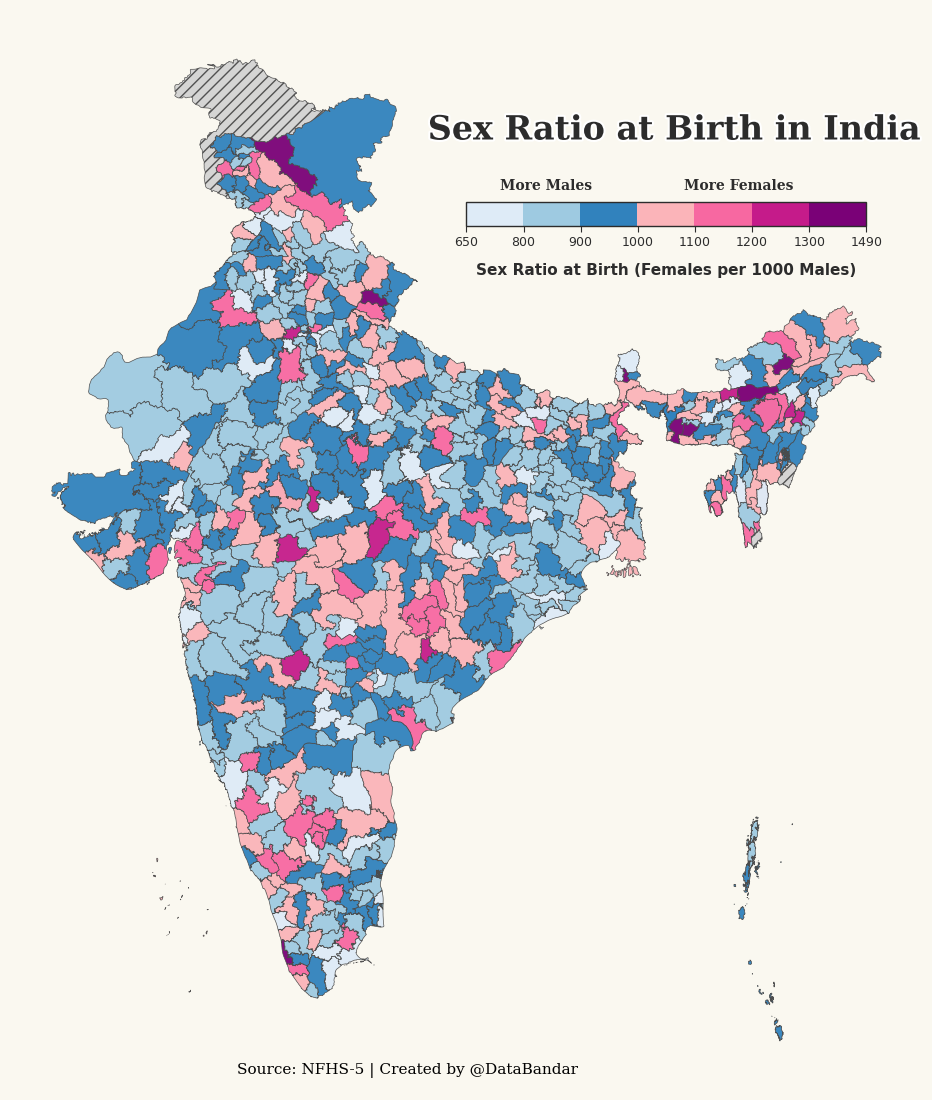

In [183]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patheffects as path_effects
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')

def create_sex_ratio_at_birth_map(merged):
    # Ensure positive values
    merged['sex_ratio_at_birth'] = merged['sex_ratio_at_birth'].abs()

    fig = plt.figure(figsize=(16, 12))
    fig.patch.set_facecolor('#faf8f0')

    ax_map = plt.axes([0.05, 0.05, 0.9, 0.9])
    ax_map.set_facecolor('#faf8f0')

    # Define bin boundaries
    bounds = [0, 800, 900, 1000, 1100, 1200, 1300, 1500]

    # Color shades: Blue for <1000, Pink for ≥1000
    colors_list = [
        '#deebf7',  # <800
        '#9ecae1',  # 800–900
        '#3182bd',  # 900–1000
        '#fbb4b9',  # 1000–1100
        '#f768a1',  # 1100–1200
        '#c51b8a',  # 1200–1300
        '#7a0177'   # 1300+
    ]

    custom_cmap = ListedColormap(colors_list)
    norm = BoundaryNorm(bounds, custom_cmap.N)

    # Plot map
    merged.plot(
        ax=ax_map,
        column='sex_ratio_at_birth',
        cmap=custom_cmap,
        norm=norm,
        edgecolor='#4a4a4a',
        linewidth=0.5,
        alpha=0.95,
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "#4a4a4a",
            "hatch": "///",
            "label": "Missing"
        }
    )

    ax_map.set_axis_off()

    # Colorbar
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm._A = []

    cbar_ax = fig.add_axes([0.50, 0.77, 0.25, 0.02])  # Horizontal colorbar
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', boundaries=bounds)

    # Use actual min and max values from data
    min_val = int((merged['sex_ratio_at_birth'].min() // 10) * 10)
    max_val = int((merged['sex_ratio_at_birth'].max() // 10 + 1) * 10)

    # Custom tick labels
    tick_positions = bounds
    tick_labels = [str(min_val), '800', '900', '1000', '1100', '1200', '1300', str(max_val)]

    cbar.set_ticks(tick_positions)
    cbar.set_ticklabels(tick_labels)

    cbar.ax.tick_params(labelsize=9, colors='#2c2c2c', length=4)
    cbar.set_label('Sex Ratio at Birth (Females per 1000 Males)', fontsize=11, fontweight='bold',
                   color='#2c2c2c', labelpad=10)
    cbar.outline.set_edgecolor('#2c2c2c')
    cbar.outline.set_linewidth(1)

    # Subtitle
    fig.text(
        0.63, 0.85,
        'Sex Ratio at Birth in India',
        ha='center', va='center',
        fontsize=24, fontweight='bold', fontfamily='serif', color='#2c2c2c',
        path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
    )

    # Source
    fig.text(0.57, 0.06,
         "Source: NFHS-5 | Created by @DataBandar",
         ha='right', va='bottom', fontsize=11, fontfamily='serif', color='black')

    plt.figtext(
        0.55, 0.8,
        'More Males',
        ha='center', fontsize=10,fontweight='bold', color='#2c2c2c',
        fontfamily='serif'
    )

    plt.figtext(
        0.67, 0.8,
        'More Females',
        ha='center', fontsize=10,fontweight='bold', color='#2c2c2c',
         fontfamily='serif'
    )


    ax_map.grid(True, alpha=0.1, color='gray', linewidth=0.5)
    plt.tight_layout()
    return fig

# === Execution ===
if __name__ == "__main__":
    map_fig = create_sex_ratio_at_birth_map(merged)

    map_fig.savefig('district_sex_ratio_at_birth_map.png', dpi=300, bbox_inches='tight',
                    facecolor=map_fig.get_facecolor(), edgecolor='none')
    map_fig.savefig('district_sex_ratio_at_birth_map.pdf', bbox_inches='tight',
                    facecolor=map_fig.get_facecolor(), edgecolor='none')

    plt.show()
